In [4]:
!pip install langdetect

In [5]:
import warnings
warnings.filterwarnings('ignore')#The warnings module is used to issue warnings to the developer about issues in the program that don't cause it to stop, but may need to be addressed. 'filterwarnings('ignore')' is used to suppress all warning messages.

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')# interactive visualizations in Python. 'plt.style.use('fivethirtyeight')' sets the aesthetic style of the plots to resemble those found on the website 'FiveThirtyEight

import pandas as pd#used for text processing tasks like pattern matching), string for common string operations, and csv to work with csv files.
import re ,string, csv

#These lines import the tweepy library, which allows Python to communicate with the Twitter API. OAuthHandler is a class for handling OAuth, the authentication method used by Twitter.
import tweepy # to access tweet API
from tweepy import OAuthHandler # for Authentication

#TextBlob is a library used for processing textual data, providing a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, and more.
from textblob import TextBlob #for Valance of Sentence(polarity)

#NLTK (Natural Language Toolkit) is a leading platform for building Python programs to work with human language data. The three lines following the import are downloading specific NLTK packages: 'stopwords' for common words to be ignored in text processing, 'punkt' for tokenization (splitting text into words and sentences), and 'wordnet' for lemmatization (bringing words down to their root form).
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# nltk.download('all') # Installing All from NLTK library
from nltk.corpus import stopwords # For Removing Stop words like < the , an , is ,..etc >
n_words= stopwords.words('english') #specify english stop words only
n_words.append("rt") #append rt for stop word dictionary.rt' is appended to this list of stopwords, it stands for 'retweet' in Twitter context.

from nltk.tokenize import word_tokenize # for Tokenizing the sentnces as tokens
from nltk.stem.porter import PorterStemmer # converting words to their root forms ,speed and simplicity
porter = PorterStemmer() #Create stemmer obejct

from nltk.stem import WordNetLemmatizer # also converting words to their actual root forms(noun , verb ,aobjective) ,but it slow
lemmatizer = WordNetLemmatizer() #Create lemmatizer obejct

from wordcloud import WordCloud,STOPWORDS #Look at Words with highest Frequency for expression

from langdetect import detect_langs # Detect language for each tweets

# CountVectorizer and TfidfVectorizer are methods for converting text data into vectors as model inputs. n-grams from NLTK are used to capture the language structure, like what words often go together.
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk import ngrams
from sklearn.model_selection import train_test_split
import time
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#These are tools to evaluate the performance of the machine learning models, specifically their accuracy and a more detailed report that includes precision, recall, and f1-score.
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


this code is reading a CSV file from the given location, ignoring any errors in lines that cannot be parsed, and storing the result in a DataFrame in the variable Data.

In [6]:
# Reading Datasets
Data=pd.read_csv("/content/stockerbot-export.csv",error_bad_lines=False)

Skipping line 731: expected 8 fields, saw 13
Skipping line 2836: expected 8 fields, saw 15
Skipping line 3058: expected 8 fields, saw 12
Skipping line 3113: expected 8 fields, saw 12
Skipping line 3194: expected 8 fields, saw 17
Skipping line 3205: expected 8 fields, saw 17
Skipping line 3255: expected 8 fields, saw 17
Skipping line 3520: expected 8 fields, saw 17
Skipping line 4078: expected 8 fields, saw 17
Skipping line 4087: expected 8 fields, saw 17
Skipping line 4088: expected 8 fields, saw 17
Skipping line 4499: expected 8 fields, saw 12



It tells you the structure of your DataFrame, the type of data it contains, and how much memory it's using. It's often one of the first functions data analysts or data scientists use when exploring a new dataset.

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28264 entries, 0 to 28263
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             28264 non-null  int64 
 1   text           28264 non-null  object
 2   timestamp      28264 non-null  object
 3   source         28264 non-null  object
 4   symbols        28264 non-null  object
 5   company_names  28263 non-null  object
 6   url            21895 non-null  object
 7   verified       28264 non-null  bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.5+ MB


Data["text"], Data["url"]: These lines convert the 'text' and 'url' columns to strings.

Data["company_names"], Data["symbols"], Data["source"]: These lines convert the 'company_names', 'symbols', and 'source' columns to 'category' data type, often used for variables with a limited number of distinct values.

Data=Data.drop(columns=['id']): This line removes the 'id' column from the DataFrame.






In [8]:
'''Convert Columns data types '''
Data["text"] = Data["text"].astype(str)
Data["url"] = Data["url"].astype(str)
Data["company_names"] = Data["company_names"].astype("category")
Data["symbols"] = Data["symbols"].astype("category")
Data["source"] = Data["source"].astype("category")
Data=Data.drop(columns=['id'])

the code block splits the 'timestamp' column of your DataFrame into several new columns ('dayofweek', 'month', 'day', 'time', 'timezone', 'year') using whitespace as a delimiter. Then it further splits the 'time' column into 'hour', 'minute', and 'second' columns using ':' as a delimiter. At the end, it displays the first two rows of the DataFrame.

In [9]:
''' Split Timestamp Column into Dates and times '''#In this code, the str.split() function is being used to split the 'timestamp' column into multiple separate columns. This is helpful when you want to break down a composite column into simpler parts for further analysis.
Data[['dayofweek','month','day','time','timezone', 'year']] = Data.timestamp.str.split(expand=True)
Data[['hour','minute','second']] = Data.time.str.split(':',expand=True)
Data.head(2)

text  \
0  VIDEO: “I was in my office. I was minding my o...   
1  The price of lumber $LB_F is down 22% since hi...   

                        timestamp        source symbols      company_names  \
0  Wed Jul 18 21:33:26 +0000 2018  GoldmanSachs      GS  The Goldman Sachs   
1  Wed Jul 18 22:22:47 +0000 2018    StockTwits       M             Macy's   

                                                 url  verified dayofweek  \
0  https://twitter.com/i/web/status/1019696670777...      True       Wed   
1  https://twitter.com/i/web/status/1019709091038...      True       Wed   

  month day      time timezone  year hour minute second  
0   Jul  18  21:33:26    +0000  2018   21     33     26  
1   Jul  18  22:22:47    +0000  2018   22     22     47

he value False for a column indicates that there are no null or missing values in that column, while the value True means that there is at least one null or missing value in the respective column.

In [10]:
''' Check for null values '''
Data.isnull().any()

text             False
timestamp        False
source           False
symbols          False
company_names     True
url              False
verified         False
dayofweek        False
month            False
day              False
time             False
timezone         False
year             False
hour             False
minute           False
second           False
dtype: bool

It's counting and printing the number of null values in the 'company_names' column.
It's displaying the rows where the 'company_names' column is null

In [11]:
''' Check for null values in Company names columns '''

print(f'null :{Data.company_names.isnull().sum()}')
Data[Data['company_names'].isnull()]

null :1


text  \
3369  When you try to gauge sentiment on a $ticker b...   

                           timestamp      source symbols company_names  url  \
3369  Thu Jul 12 14:28:55 +0000 2018  provotrout  ticker           NaN  nan   

      verified dayofweek month day      time timezone  year hour minute second  
3369     False       Thu   Jul  12  14:28:55    +0000  2018   14     28     55

functions are  used to clean and preprocess text data to make it ready for further analysis or machine learning algorithms. It involves several common steps such as lower-casing, removing undesired elements, tokenizing, stemming, and stop-word removal.

In [12]:
# Define Clean Function to fix text
def Clean(text):

  # Frist converting all letters to lower case
  text= text.lower()#text.lower(): Converts all characters in the text to lowercase. This is done to standardize the text and ensure case-insensitivity.

  # removing unwanted digits ,special chracters from the text
  text= ' '.join(re.sub("(@[A-Za-z0-9]+)", " ", text).split()) #tags
  text= ' '.join(re.sub("^@?(\w){1,15}$", " ", text).split())
#The several re.sub() functions are using regular expressions to remove undesired characters and patterns:
#Removes Twitter handles.
#Removes URLs.
#Removes extra white spaces.
#Removes special characters and digits.
#Replaces hyphens and underscores with spaces.

  text= ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split())   #Links
  text= ' '.join(re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\), ]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"," ", text).split())
  text= ' '.join(re.sub(r'http\S+', '',text).split())


  text= ' '.join(re.sub(r'www\S+', '',text).split())
  text= ' '.join(re.sub("\s+", " ",text).split()) #Extrem white Space
  text= ' '.join(re.sub("[^-9A-Za-z ]", "" ,text).split()) #digits
  text= ' '.join(re.sub('-', ' ', text).split())
  text= ' '.join(re.sub('_', ' ', text).split()) #underscore

  # Display available PUNCTUATION for examples
  #for c in string.punctuation:
       #print(f"[{c}]")

  # removing stopwards and numbers from STRING library
  table= str.maketrans('', '', string.punctuation+string.digits)
  text = text.translate(table)

  # Split Sentence as tokens words
  tokens = word_tokenize(text)

  # converting words to their root forms by STEMMING THE WORDS
#   stemmed1 = [lemmatizer.lemmatize(word) for word in tokens] #Covert words to their actual root
  stemmed2 = [porter.stem(word) for word in tokens] # Covert words to their rootbut not actual

  # Delete each stop words from English stop words
#   words = [w for w in stemmed1 if not w in n_words] #n_words contains English stop words
  words = [w for w in stemmed2 if not w in n_words] #n_words contains English stop words

  text  = ' '.join(words)

  return text

In [13]:
# Text Before Pre-processing
Data.text

0        VIDEO: “I was in my office. I was minding my o...
1        The price of lumber $LB_F is down 22% since hi...
2        Who says the American Dream is dead? https://t...
3        Barry Silbert is extremely optimistic on bitco...
4        How satellites avoid attacks and space junk wh...
                               ...                        
28259           $FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9
28260    【仮想通貨】ビットコインの価格上昇、８０万円台回復　約１カ月半ぶり　　　　　　$BTC ht...
28261    RT @invest_in_hd: 'Nuff said!  $TEL #telcoin #...
28262    【仮想通貨】ビットコインの価格上昇、８０万円台回復　約１カ月半ぶり　　　　　　$BTC ht...
28263    Stellar $XLM price: $0.297852 Binance registra...
Name: text, Length: 28264, dtype: object

this line is used to filter your DataFrame, keeping only the rows where 'source' is not equal to "test5f1798"

In [14]:
#Delete unwanted source form our text
Data=Data[Data["source"] != "test5f1798"]

these two lines are cleaning the text data and removing certain unwanted entries from your DataFrame.

In [15]:
# apply Clean Funsction to our Text
Data.text=[Clean(x) for x in Data.text]
# Delete Unwanted Some Text
Data=Data[Data["text"]!='btc']

In [16]:
# Text after Pre-processing
Data.text

0        video wa offic wa mind busi david solomon tell...
1        price lumber lbf sinc hit ytd high maci turnar...
2                                  say american dream dead
3        barri silbert extrem optimist bitcoin predict ...
4        satellit avoid attack space junk circl earth paid
                               ...                        
28256    exxon onc perfect machin run dri wall street j...
28257                         fallen hero today btc action
28258    new exchang telcoin mid august im glad tel big...
28261    inhd nuff said tel telcoin telfam crypto block...
28263     stellar xlm price binanc registr open limit time
Name: text, Length: 28225, dtype: object

this code is performing sentiment analysis on your text data, assigning a polarity score and emotion to each text, and adding these as new columns in your DataFrame.

In [18]:
''' Detect Emotions for each text Form TextBlob Library '''

detectEmotion=[]
detectPolarity=[]

for txt in Data.text:

    analysis=TextBlob(txt)
    Polarity=analysis.sentiment.polarity

    if Polarity  <0:
        emotion='2'  #Negative
    elif Polarity>0:
        emotion='1'  #Positive
    else:
        emotion='0'  #Neutral

    detectEmotion.append(emotion)
    detectPolarity.append(Polarity)

# detectEmotion=pd.DataFrame()

Data['Polarity']=detectPolarity
Data['Emotion'] =detectEmotion
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28225 entries, 0 to 28263
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   text           28225 non-null  object  
 1   timestamp      28225 non-null  object  
 2   source         28225 non-null  category
 3   symbols        28225 non-null  category
 4   company_names  28224 non-null  category
 5   url            28225 non-null  object  
 6   verified       28225 non-null  bool    
 7   dayofweek      28225 non-null  object  
 8   month          28225 non-null  object  
 9   day            28225 non-null  object  
 10  time           28225 non-null  object  
 11  timezone       28225 non-null  object  
 12  year           28225 non-null  object  
 13  hour           28225 non-null  object  
 14  minute         28225 non-null  object  
 15  second         28225 non-null  object  
 16  Polarity       28225 non-null  float64 
 17  Emotion        28225 non-null  

In [19]:
Data.head()

text  \
0  video wa offic wa mind busi david solomon tell...   
1  price lumber lbf sinc hit ytd high maci turnar...   
2                            say american dream dead   
3  barri silbert extrem optimist bitcoin predict ...   
4  satellit avoid attack space junk circl earth paid   

                        timestamp        source symbols      company_names  \
0  Wed Jul 18 21:33:26 +0000 2018  GoldmanSachs      GS  The Goldman Sachs   
1  Wed Jul 18 22:22:47 +0000 2018    StockTwits       M             Macy's   
2  Wed Jul 18 22:32:01 +0000 2018     TheStreet     AIG           American   
3  Wed Jul 18 22:52:52 +0000 2018   MarketWatch     BTC            Bitcoin   
4  Wed Jul 18 23:00:01 +0000 2018        Forbes    ORCL             Oracle   

                                                 url  verified dayofweek  \
0  https://twitter.com/i/web/status/1019696670777...      True       Wed   
1  https://twitter.com/i/web/status/1019709091038...      True       Wed   
2                            https://buff.ly/2L3kmc4      True       Wed   
3  https://twitter.com/i/web/status/1019716662587...      True       Wed   
4                     http://on.forbes.com/6013DqDDU      True       Wed   

  month day      time timezone  year hour minute second  Polarity Emotion  
0   Jul  18  21:33:26    +0000  2018   21     33     26  0.000000       0  
1   Jul  18  22:22:47    +0000  2018   22     22     47  0.160000       1  
2   Jul  18  22:32:01    +0000  2018   22     32     01 -0.100000       2  
3   Jul  18  22:52:52    +0000  2018   22     52     52  0.136364       1  
4   Jul  18  23:00:01    +0000  2018   23     00     01  0.000000       0

this code checks whether the first column of each row in your DataFrame contains any alphabetical characters, records the result in a new column, and prints the number of rows that passed and failed this validation.

18 is the count of rows in your DataFrame where the 'valid' column is False. This means these rows do not contain any alphabetical characters (a-z or A-Z) in the first column of your DataFrame.

28207 is the count of rows in your DataFrame where the 'valid' column is True. These rows contain at least one alphabetical character in the first column of your DataFrame.

In [20]:
#check for valid string only to detect languages

TextValid=[]

for i in range(len(Data)):
    TextValid.append(bool(re.match('^(?=.*[a-zA-Z])', Data.iloc[i,0])))

Data['valid']=TextValid
print(len(Data[Data['valid']==False]))
print(len(Data[Data['valid']==True]))

18
28207


In [21]:
Data.head()

text  \
0  video wa offic wa mind busi david solomon tell...   
1  price lumber lbf sinc hit ytd high maci turnar...   
2                            say american dream dead   
3  barri silbert extrem optimist bitcoin predict ...   
4  satellit avoid attack space junk circl earth paid   

                        timestamp        source symbols      company_names  \
0  Wed Jul 18 21:33:26 +0000 2018  GoldmanSachs      GS  The Goldman Sachs   
1  Wed Jul 18 22:22:47 +0000 2018    StockTwits       M             Macy's   
2  Wed Jul 18 22:32:01 +0000 2018     TheStreet     AIG           American   
3  Wed Jul 18 22:52:52 +0000 2018   MarketWatch     BTC            Bitcoin   
4  Wed Jul 18 23:00:01 +0000 2018        Forbes    ORCL             Oracle   

                                                 url  verified dayofweek  \
0  https://twitter.com/i/web/status/1019696670777...      True       Wed   
1  https://twitter.com/i/web/status/1019709091038...      True       Wed   
2                            https://buff.ly/2L3kmc4      True       Wed   
3  https://twitter.com/i/web/status/1019716662587...      True       Wed   
4                     http://on.forbes.com/6013DqDDU      True       Wed   

  month day      time timezone  year hour minute second  Polarity Emotion  \
0   Jul  18  21:33:26    +0000  2018   21     33     26  0.000000       0   
1   Jul  18  22:22:47    +0000  2018   22     22     47  0.160000       1   
2   Jul  18  22:32:01    +0000  2018   22     32     01 -0.100000       2   
3   Jul  18  22:52:52    +0000  2018   22     52     52  0.136364       1   
4   Jul  18  23:00:01    +0000  2018   23     00     01  0.000000       0   

   valid  
0   True  
1   True  
2   True  
3   True  
4   True

this line is used to filter your DataFrame, keeping only the rows where 'valid' is equal to True

In [23]:
# valid string only

Data=Data[Data['valid']==True]

this code detects the language of each text in your DataFrame and adds this information as a new 'language' column.

In [24]:
'''Detect languages for each text to filter into specific Lang'''

languages = []

# Loop over the sentences in the data and detect their language
for row in range(len(Data)):
    languages.append(detect_langs(Data.iloc[row, 0]))

# print('The detected languages are: ', languages) >>> ['en':'N']
languages = [str(lang).split(':')[0][1:] for lang in languages]

# Assign the list to a new feature
Data['language'] = languages

In [25]:
# look at Lang detected from our text

Data['language'].value_counts()

en    19479
ca     1461
it     1161
fr     1097
ro      856
sv      649
nl      510
da      422
no      322
es      312
cy      292
af      241
so      199
id      154
pt      145
sl      131
et      113
tl      109
sw       71
pl       63
de       61
sq       61
fi       58
hr       57
sk       38
hu       30
cs       29
lt       26
tr       24
vi       20
lv       16
Name: language, dtype: int64

In [26]:
# We Only want to deal with english text for now , so we will filter data for EN Only

Data=Data[Data['language']=='en']

In [27]:
Data=Data[['text','url','year','month','day','dayofweek','hour','minute','second','source','symbols','Polarity','Emotion','language','verified']]
Data.head(4)

text  \
0  video wa offic wa mind busi david solomon tell...   
1  price lumber lbf sinc hit ytd high maci turnar...   
2                            say american dream dead   
3  barri silbert extrem optimist bitcoin predict ...   

                                                 url  year month day  \
0  https://twitter.com/i/web/status/1019696670777...  2018   Jul  18   
1  https://twitter.com/i/web/status/1019709091038...  2018   Jul  18   
2                            https://buff.ly/2L3kmc4  2018   Jul  18   
3  https://twitter.com/i/web/status/1019716662587...  2018   Jul  18   

  dayofweek hour minute second        source symbols  Polarity Emotion  \
0       Wed   21     33     26  GoldmanSachs      GS  0.000000       0   
1       Wed   22     22     47    StockTwits       M  0.160000       1   
2       Wed   22     32     01     TheStreet     AIG -0.100000       2   
3       Wed   22     52     52   MarketWatch     BTC  0.136364       1   

  language  verified  
0       en      True  
1       en      True  
2       en      True  
3       en      True

In [28]:
# the below function will create a word cloud

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word  # double check for nay links
                                and not word.startswith('#')  # removing hash tags
                                and word != 'rt'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS, # using stopwords provided by Word cloud its optional since we already removed stopwords :)
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    # using matplotlib to display the images in notebook itself.
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()


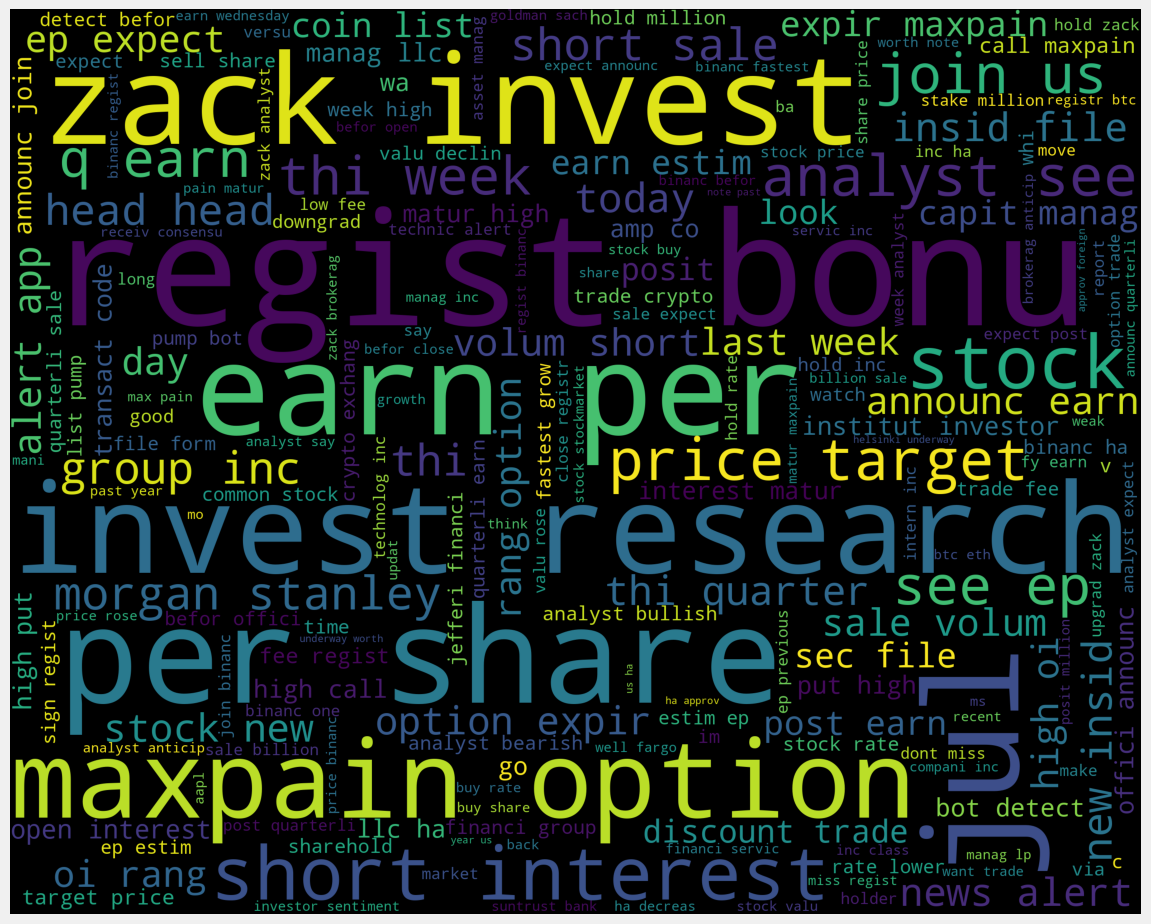

In [29]:
wordcloud_draw(Data['text'])

Most Positive words Frequency


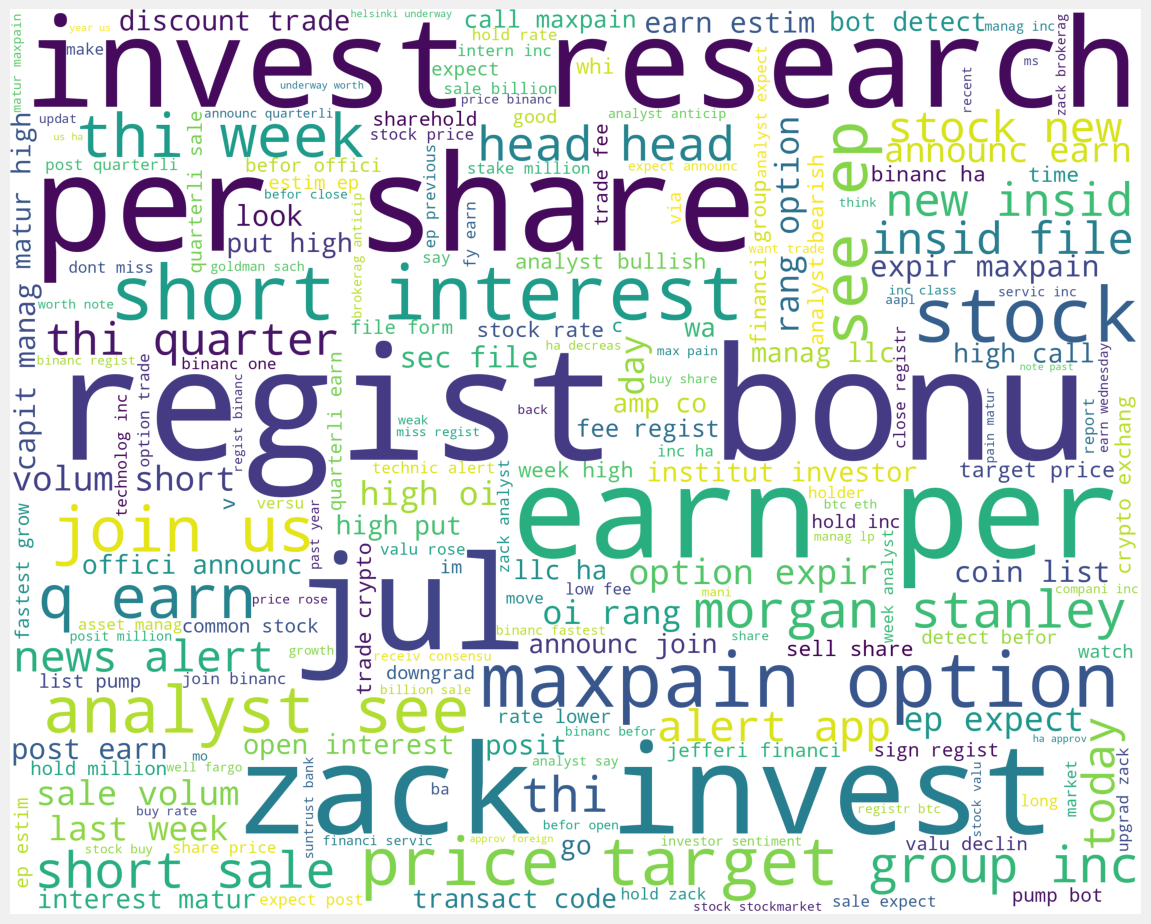

In [51]:
print("Most Positive words Frequency")
wordcloud_draw(Data['text'], 'white')

In [58]:
# Percentage of each Emotions overall symbols

df_neutral   = Data['text'][ Data['Emotion'] == '0']
df_positive  = Data['text'][ Data['Emotion'] == '1']
df_negative  = Data['text'][ Data['Emotion'] == '2']


print(f' Percentage Positive: {len(df_positive)/len(Data)}\n Percentage Negetive: {len(df_negative)/len(Data)}\n Percentage Neutral: {len(df_neutral)/len(Data)}')

 Percentage Positive: 0.2583294830330099
 Percentage Negetive: 0.08121566815544946
 Percentage Neutral: 0.6604548488115406


In [59]:
Data.head()

text  \
0  video wa offic wa mind busi david solomon tell...   
1  price lumber lbf sinc hit ytd high maci turnar...   
2                            say american dream dead   
3  barri silbert extrem optimist bitcoin predict ...   
4  satellit avoid attack space junk circl earth paid   

                                                 url  year month day  \
0  https://twitter.com/i/web/status/1019696670777...  2018   Jul  18   
1  https://twitter.com/i/web/status/1019709091038...  2018   Jul  18   
2                            https://buff.ly/2L3kmc4  2018   Jul  18   
3  https://twitter.com/i/web/status/1019716662587...  2018   Jul  18   
4                     http://on.forbes.com/6013DqDDU  2018   Jul  18   

  dayofweek hour minute second        source symbols  Polarity Emotion  \
0       Wed   21     33     26  GoldmanSachs      GS  0.000000       0   
1       Wed   22     22     47    StockTwits       M  0.160000       1   
2       Wed   22     32     01     TheStreet     AIG -0.100000       2   
3       Wed   22     52     52   MarketWatch     BTC  0.136364       1   
4       Wed   23     00     01        Forbes    ORCL  0.000000       0   

  language  verified  
0       en      True  
1       en      True  
2       en      True  
3       en      True  
4       en      True

Most Positive words Frequency


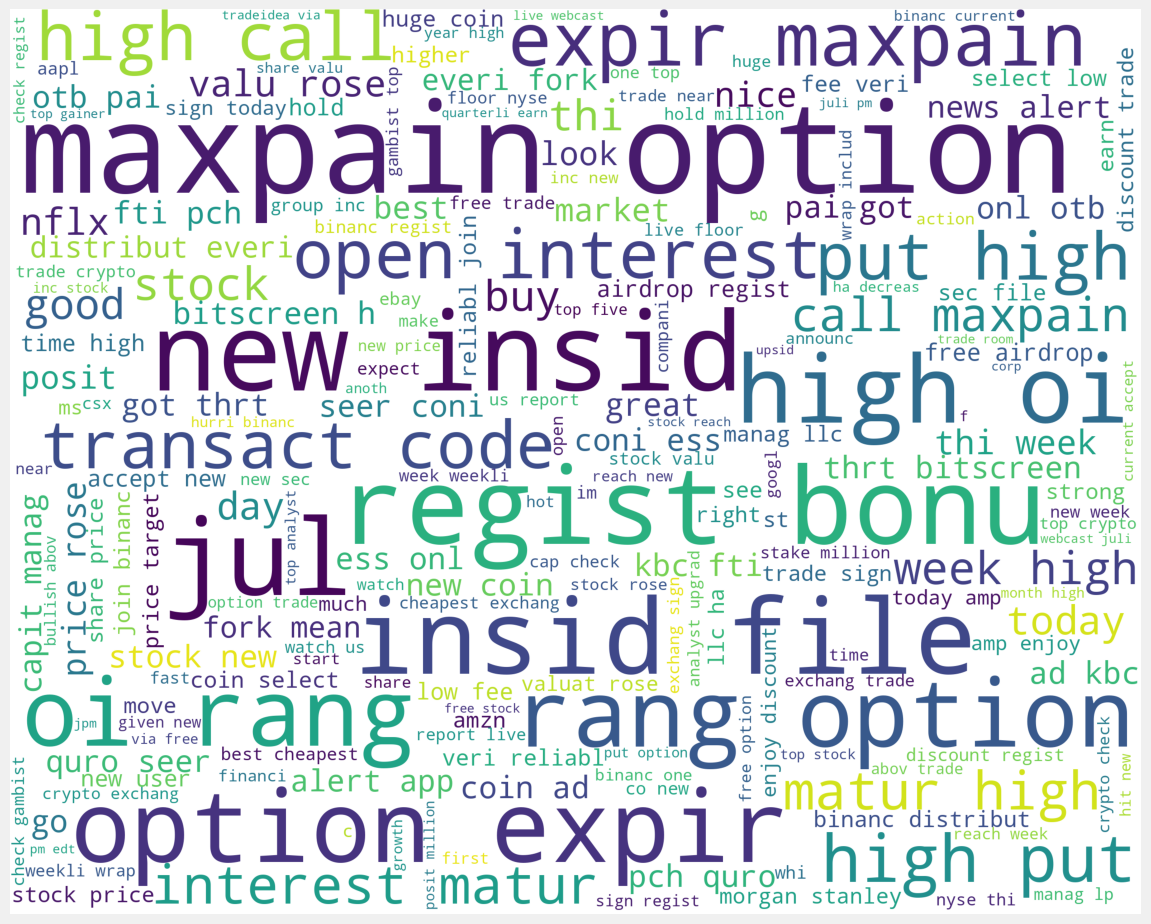

Most Negative words Frequency


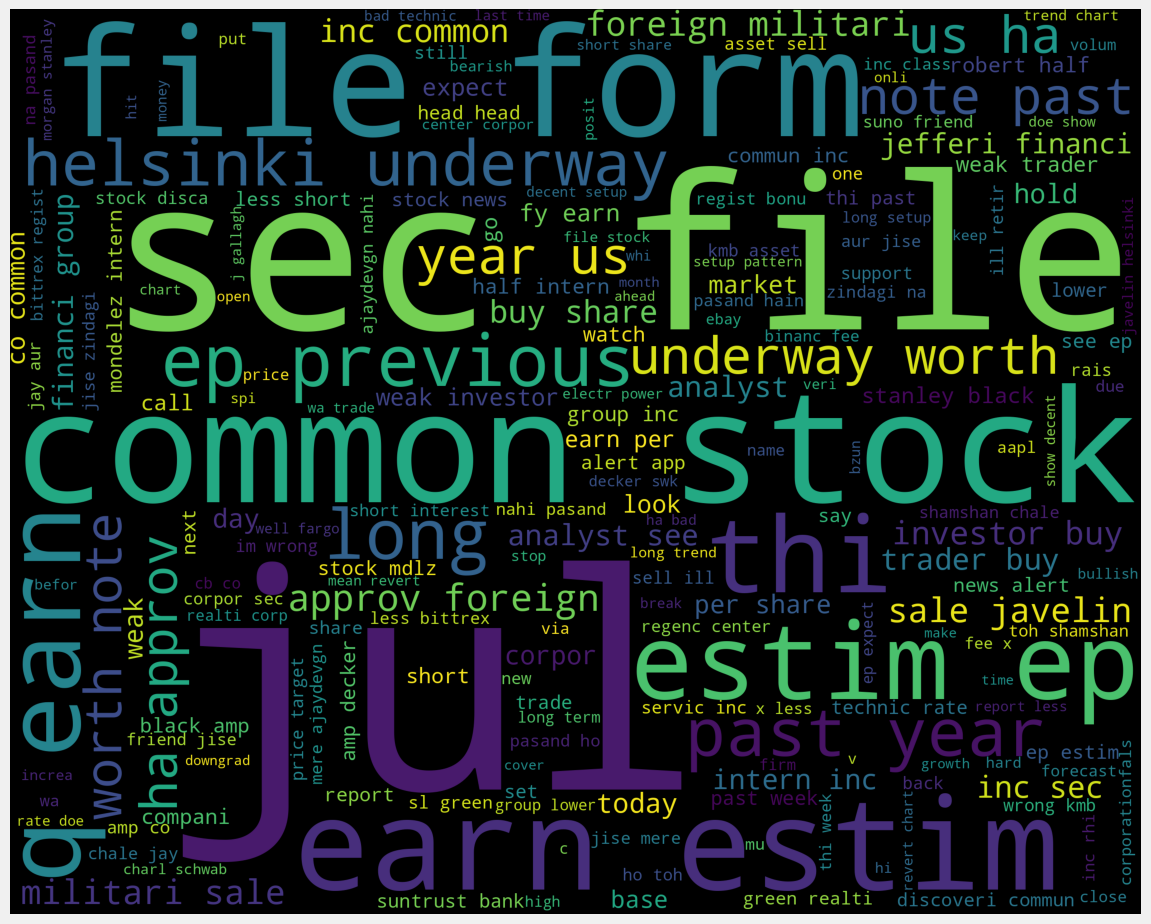

Most Neutral words Frequency


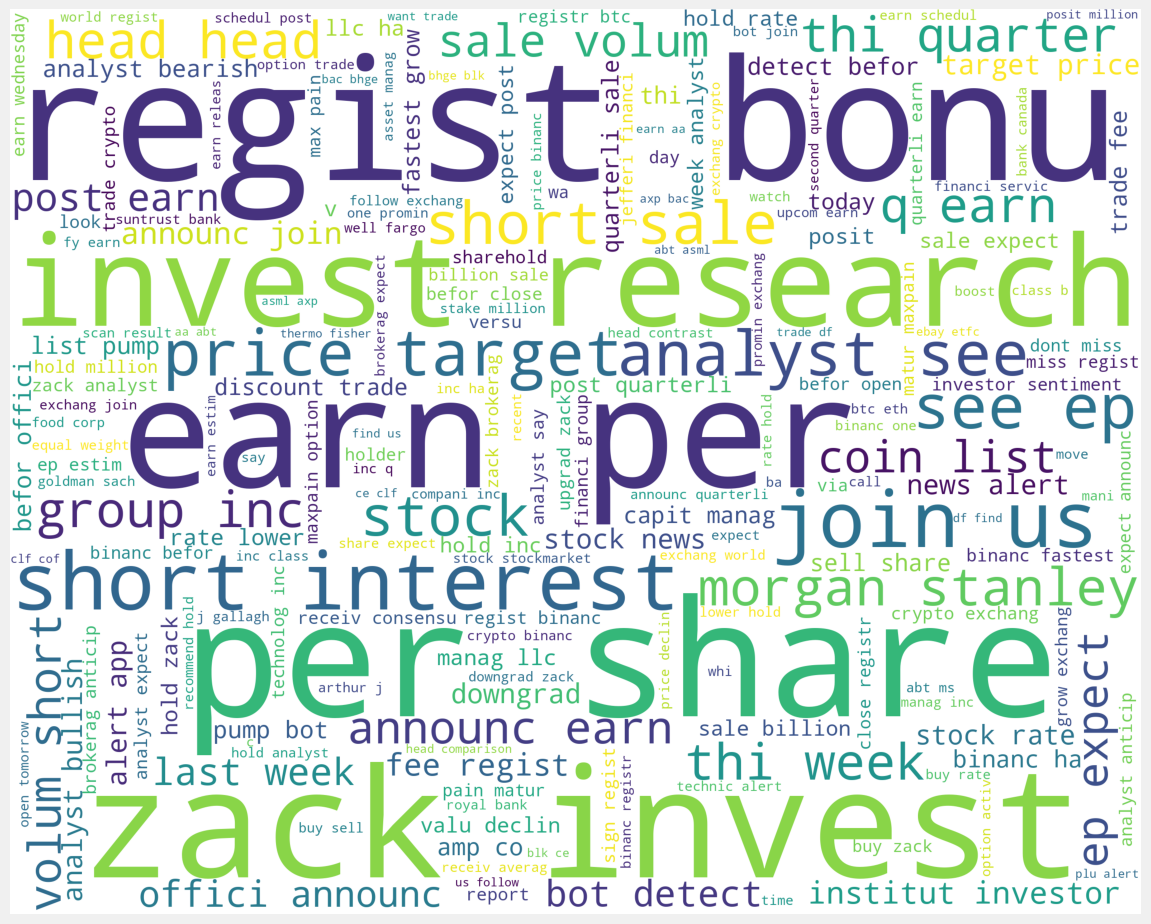

In [64]:
print("Most Positive words Frequency")
wordcloud_draw(df_positive, 'white')
print("Most Negative words Frequency")
wordcloud_draw(df_negative)
print("Most Neutral words Frequency")
wordcloud_draw(df_neutral, 'white')

The function NgramModels you provided is used to perform a machine learning classification task. The function is training a model, predicting, and providing an evaluation of model performance.

Here is what each part of the function does:

Data Splitting: This splits the data into a training set (80% of the data) and a test set (20% of the data). This is a common practice in machine learning to ensure that the model can generalize well to unseen data.

Vectorization: The text data is converted into a numerical format (a process called vectorization) that can be used by the machine learning model. Here, CountVectorizer is used, which converts the text into a matrix of token counts. This is a simple and effective way to represent text for use in machine learning. The ngram_range parameter determines the size of the 'chunks' of text that are used. (n,n) means it will create n-grams only.

Model Training: The machine learning model specified by the Model parameter is trained on the vectorized training data. The time module is used to time how long the training process takes.

Model Prediction: The trained model is then used to predict the sentiments (Emotions) of the test data. Again, the prediction time is measured.

Evaluation: Finally, the function prints out several statistics that help to understand how well the model is performing. This includes the time taken for training and prediction, the accuracy of the model on both the training and test datasets, and a classification report that gives detailed metrics like precision, recall, f1-score for each class of sentiment.

In [66]:
def NgramModels(Model , txt, n):

    x_train, x_test, y_train, y_test = train_test_split(Data['text'], Data['Emotion'], test_size=0.2, random_state=50)

    vect      = CountVectorizer(max_features=1000 , ngram_range=(n,n))
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)

    model     = Model
    t0        = time.time()
    model.fit(train_vect, y_train)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1

    accuracy  = model.score(train_vect, y_train)
    predicted = model.predict(test_vect)

    report = classification_report(y_test, predicted, output_dict=True)
    print("Models with " , n , "-grams :\n")
    print('********************** \n')
    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
    print('Positive: ', report['1'])
    print('Neutral : ', report['0'])
    print('Negative: ', report['2'])
    print('\n --------------------------------------------------------------------------------------------------- \n')

the k-Nearest Neighbors (KNN) algorithm to your text data after transforming it using an N-gram model. The k-NN algorithm is a type of instance-based learning where the function is only approximated locally and all computation is deferred until function evaluation. In your function, the KNN model is trained and evaluated for different numbers of neighbors k, specified in the list [1,3,5,7,10].

In [67]:
def KNN_Ngram(n):

    x_train, x_test, y_train, y_test = train_test_split(Data['text'], Data['Emotion'], test_size=0.2, random_state=50)

    vect      = CountVectorizer(max_features=1000 , ngram_range=(n,n))
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)

    for k in [1,3,5,7,10]:

        model = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        t0        = time.time()
        model.fit(train_vect, y_train)
        t1        = time.time()
        predicted = model.predict(test_vect)
        t2        = time.time()
        time_train= t1-t0
        time_pred = t2-t1

        accuracy  = model.score(train_vect, y_train)
        predicted = model.predict(test_vect)

        report = classification_report(y_test, predicted, output_dict=True)

        print("Models with " , n , "-grams :\n")
        print('********************** \n')
        print("Classification Report for k = {} is:\n".format(k))
        print("Training time: %fs ; Prediction time: %fs \n" % (time_train, time_pred))
        print('Accuracy score train set :', accuracy)
        print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
        print('Positive: ', report['1'])
        print('Neutral : ', report['0'])
        print('Negative: ', report['2'])
        print('\n -------------------------------------------------------------------------------------- \n')

The TF-IDF (Term Frequency-Inverse Document Frequency) method is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word.

In [68]:
def TFIDFModels(Model,txt):

    x_train, x_test, y_train, y_test = train_test_split(Data['text'], Data['Emotion'], test_size=0.2, random_state=50)

    vect      = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)

    model     = Model
    t0        = time.time()
    model.fit(train_vect, y_train)
    t1        = time.time()
    predicted = model.predict(test_vect)
    t2        = time.time()
    time_train= t1-t0
    time_pred = t2-t1

    accuracy  = model.score(train_vect, y_train)
    predicted = model.predict(test_vect)

    report = classification_report(y_test, predicted, output_dict=True)

    print(txt)
    print("Training time: %fs; Prediction time: %fs \n" % (time_train, time_pred))
    print('Accuracy score train set :', accuracy)
    print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
    print('Positive: ', report['1'])
    print('Neutral : ', report['0'])
    print('Negative: ', report['2'])
    print('\n -------------------------------------------------------------------------------------- \n')

This function trains the model using different numbers of nearest neighbors (k = 1, 3, 5, 7, 10) and displays the training time, prediction time, and accuracy scores for both the train and test sets. It also prints a classification report for each value of k.

In [69]:
def KNN_TFIDF():

    x_train, x_test, y_train, y_test = train_test_split(Data['text'], Data['Emotion'], test_size=0.2, random_state=50)

    vect      = TfidfVectorizer(min_df = 5, max_df =0.8, sublinear_tf = True, use_idf = True)
    train_vect= vect.fit_transform(x_train)
    test_vect = vect.transform(x_test)

    for k in [1,3,5,7,10]:

        model = KNeighborsClassifier(n_neighbors=k,algorithm='brute')
        t0        = time.time()
        model.fit(train_vect, y_train)
        t1        = time.time()
        predicted = model.predict(test_vect)
        t2        = time.time()
        time_train= t1-t0
        time_pred = t2-t1

        accuracy  = model.score(train_vect, y_train)
        predicted = model.predict(test_vect)

        report = classification_report(y_test, predicted, output_dict=True)

        print("Classification Report for k = {} is:\n".format(k))
        print("Training time: %fs ; Prediction time: %fs \n" % (time_train, time_pred))
        print('Accuracy score train set :', accuracy)
        print('Accuracy score test set  :', accuracy_score(y_test, predicted),'\n')
        print('Positive: ', report['1'])
        print('Neutral : ', report['0'])
        print('Negative: ', report['2'])
        print('\n -------------------------------------------------------------------------------------- \n')

The code  applies various models to data using N-gram representation, and for different values of N (2 and 3).

The models being used are Logistic Regression, Support Vector Classifier, Decision Tree Classifier, and K-Nearest Neighbors (KNN).  applying each of these models for bigrams (N=2) and trigrams (N=3).

In [70]:
SupportVectorClassifier=svm.SVC(kernel='linear')

LogReg2=NgramModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ', n=2)
LogReg3=NgramModels(Model=LogisticRegression(),txt='Logistic Regression Model : \n ', n=3)

svm2=NgramModels(Model=SupportVectorClassifier ,txt='Support Vectoer Classifier Model : \n ', n=2)
svm3=NgramModels(Model=SupportVectorClassifier ,txt='Support Vectoer Classifier Model : \n ', n=3)

DecTree2=NgramModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ', n=2)
DecTree3=NgramModels(Model=tree.DecisionTreeClassifier(),txt='Decision Tree Classifier Model : \n ', n=3)

KNN2=KNN_Ngram(2)
KNN3=KNN_Ngram(3)

Models with  2 -grams :

********************** 

Logistic Regression Model : 
 
Training time: 0.788368s; Prediction time: 0.000955s 

Accuracy score train set : 0.8106269652826799
Accuracy score test set  : 0.7982546201232033 

Positive:  {'precision': 0.9329004329004329, 'recall': 0.4314314314314314, 'f1-score': 0.5900068446269678, 'support': 999}
Neutral :  {'precision': 0.7752100840336135, 'recall': 0.9926979246733282, 'f1-score': 0.8705763397371082, 'support': 2602}
Negative:  {'precision': 0.9411764705882353, 'recall': 0.3254237288135593, 'f1-score': 0.4836272040302267, 'support': 295}

 --------------------------------------------------------------------------------------------------- 

Models with  3 -grams :

********************** 

Logistic Regression Model : 
 
Training time: 0.349577s; Prediction time: 0.000396s 

Accuracy score train set : 0.7804017198228839
Accuracy score test set  : 0.773870636550308 

Positive:  {'precision': 0.9654178674351584, 'recall': 0.3353353353

In [71]:
SupportVectorClassifier = svm.SVC(kernel='linear')

print('Models with Tfidf Feature extraction Techniques : \n')
print('************************************************ \n')

TFIDFModels(Model=LogisticRegression(), txt='Logistic Regression Model : \n ')
TFIDFModels(Model=SupportVectorClassifier, txt='Support Vector Classifier Model : \n ')
TFIDFModels(Model=tree.DecisionTreeClassifier(), txt='Decision Tree Classifier Model : \n ')
KNN_TFIDF()

Models with Tfidf Feature extraction Techniques : 

************************************************ 

Logistic Regression Model : 
 
Training time: 1.712870s; Prediction time: 0.001036s 

Accuracy score train set : 0.9699030995315407
Accuracy score test set  : 0.9504620123203286 

Positive:  {'precision': 0.9825897714907508, 'recall': 0.9039039039039038, 'f1-score': 0.9416058394160582, 'support': 999}
Neutral :  {'precision': 0.9385394070860448, 'recall': 0.9976940814757879, 'f1-score': 0.9672131147540983, 'support': 2602}
Negative:  {'precision': 0.966824644549763, 'recall': 0.6915254237288135, 'f1-score': 0.8063241106719368, 'support': 295}

 -------------------------------------------------------------------------------------- 

Support Vector Classifier Model : 
 
Training time: 13.319631s; Prediction time: 2.047544s 

Accuracy score train set : 0.9893473657190528
Accuracy score test set  : 0.9727926078028748 

Positive:  {'precision': 0.9884575026232949, 'recall': 0.9429429429429

In [ ]:
idx = pd.MultiIndex.from_product([['2-grams', '3-grams', 'TFIDF'],['Accuracy Training %','Accuracy Testing %']],names=['FeatureExtraction', 'Metric'])
col = ['LogisticRegression', 'SupportVectorClassifier', 'DecisionTree', 'KNeighborsClassifier']

Result = pd.DataFrame('*', idx, col)
Result.LogisticRegression=['80.79','80.32','77.80','77.53','97.06','95.22']
Result.SupportVectorClassifier=['80.73','80.42','77.80','77.74','98.89','97.83']
Result.DecisionTree=['82.28','80.50','78.23','77.59','99.97','98.63']
Result.KNeighborsClassifier=['80.84','77.61','77.54','75.99','99.96','87.05']

In [ ]:
Result

LogisticRegression  \
FeatureExtraction Metric                                   
2-grams           Accuracy Training %              80.79   
                  Accuracy Testing %               80.32   
3-grams           Accuracy Training %              77.80   
                  Accuracy Testing %               77.53   
TFIDF             Accuracy Training %              97.06   
                  Accuracy Testing %               95.22   

                                      SupportVectorClassifier DecisionTree  \
FeatureExtraction Metric                                                     
2-grams           Accuracy Training %                   80.73        82.28   
                  Accuracy Testing %                    80.42        80.50   
3-grams           Accuracy Training %                   77.80        78.23   
                  Accuracy Testing %                    77.74        77.59   
TFIDF             Accuracy Training %                   98.89        99.97   
                  Accuracy Testing %                    97.83        98.63   

                                      KNeighborsClassifier  
FeatureExtraction Metric                                    
2-grams           Accuracy Training %                80.84  
                  Accuracy Testing %                 77.61  
3-grams           Accuracy Training %                77.54  
                  Accuracy Testing %                 75.99  
TFIDF             Accuracy Training %                99.96  
                  Accuracy Testing %                 87.05

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5666129466353989219, *['LogisticRegression'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5666129466353989219, *['SupportVectorClassifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5666129466353989219, *['DecisionTree'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def categorical_histogram(df, colname, figsize=(2, 1.2), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(df_5666129466353989219, *['KNeighborsClassifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5666129466353989219, *['LogisticRegression', 'SupportVectorClassifier'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5666129466353989219, *['SupportVectorClassifier', 'DecisionTree'], **{})
chart

import numpy as np
from google.colab import autoviz
df_5666129466353989219 = autoviz.get_df('df_5666129466353989219')

def heatmap(df, x_colname, y_colname, figsize=(2, 2), mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=figsize)
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(df_5666129466353989219, *['DecisionTree', 'KNeighborsClassifier'], **{})
chart